In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

In [2]:
# Define the time range
start = datetime(1963, 1, 1)
end = datetime(2025, 1, 1)

# Fetch data from FRED
gdp = web.DataReader("GDP", "fred", start, end)  # GDP in billions
debt = web.DataReader("GFDEBTN", "fred", start, end)  # Gross Federal Debt in millions
yield10 = web.DataReader("GS10", "fred", start, end)  # 10 year treasury yield
# Get real GDP (quarterly, in billions of chained 2012 dollars)
gdp_real = web.DataReader('GDPC1', 'fred', start, end)

# Fetch federal budget deficit data (as a percentage of GDP)
federal_deficit_pct_gdp = web.DataReader("FYFSGDA188S", "fred", start, end)

# To get absolute values of the federal budget, use:
federal_budget_deficit_abs = web.DataReader("FYFSD", "fred", start, end)  # Federal Surplus or Deficit

# If you need to scale it to billions (since FEDERAL DEFICIT is usually given in millions):
federal_budget_deficit_abs = federal_budget_deficit_abs / 1000


# Calculate QoQ inflation adjusted growth (annualized)
gdp_real_growth_qoq_annualized = (gdp_real.pct_change(periods=1) + 1)**4 - 1
gdp_real_growth_qoq_annualized *= 100
gdp_real_growth_qoq_annualized = gdp_real_growth_qoq_annualized.resample("YE").mean()

# Calculate QoQ growth (annualized)
gdp_growth_qoq_annualized = (gdp.pct_change(periods=1) + 1)**4 - 1
gdp_growth_qoq_annualized *= 100
gdp_growth_qoq_annualized = gdp_growth_qoq_annualized.resample("YE").mean()

# Resample to annual frequency for simplicity
yield10_annual = yield10.resample("YE").mean()
gdp_annual = gdp.resample("YE").mean()
gdp_real_annual = gdp_real.resample("YE").mean()
debt_annual = debt.resample("YE").mean()/1000
deficit_to_gdp_annual = federal_deficit_pct_gdp.resample("YE").mean()

# Calculate Debt-to-GDP ratio [%]
debt_to_gdp = (debt_annual["GFDEBTN"] / gdp_annual["GDP"])*100
years = debt_to_gdp.index.year
gdp_trillions = gdp_annual["GDP"] / 1000  # Convert GDP to trillions
gdp_real_trillions = gdp_real_annual["GDPC1"] / 1000  # Convert GDP to trillions


# Debt service to GDP ratio
debtservice = debt_annual["GFDEBTN"] * yield10_annual["GS10"] / gdp_annual["GDP"]

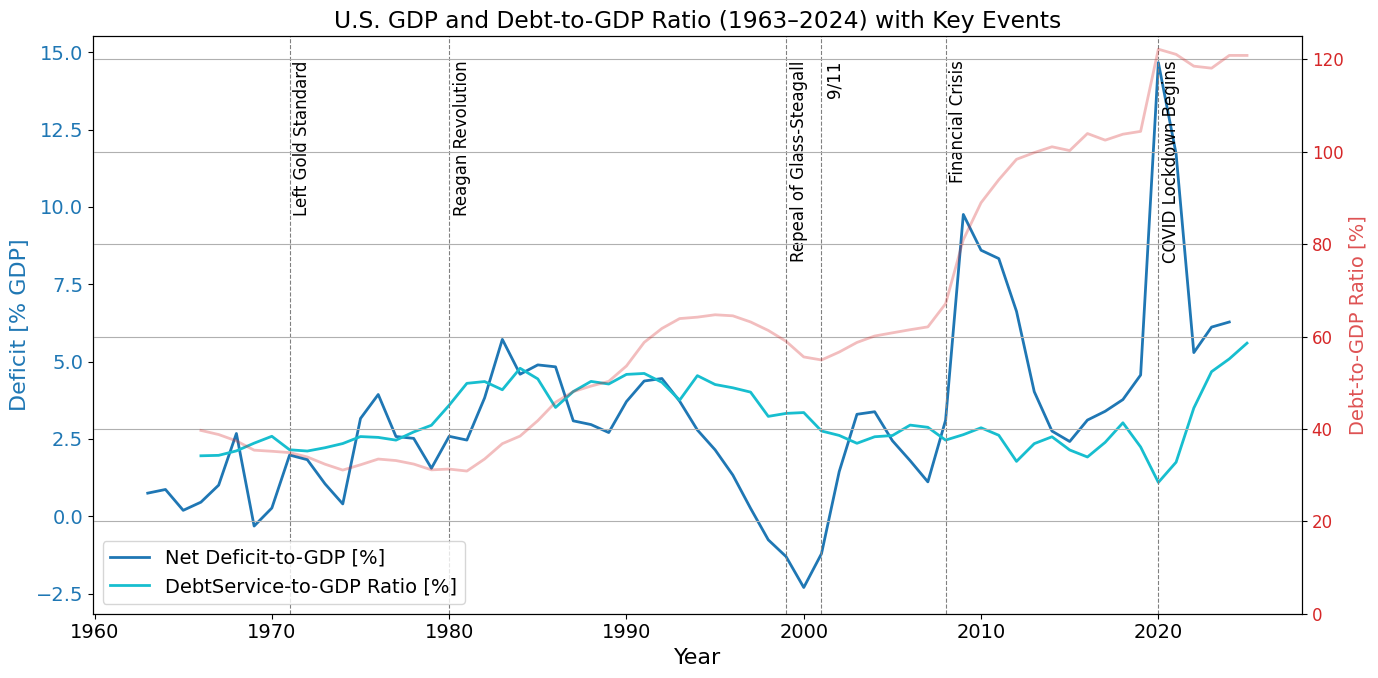

In [10]:
# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

plt.rcParams.update({'font.size': 14} )  # Set default font size for the entire plot

# Plot deficit_to_gdp_annual
color = "tab:blue"
ax1.set_xlabel("Year", fontsize=16)  # Increase x-axis label size
ax1.plot(deficit_to_gdp_annual.index.year, -1*deficit_to_gdp_annual, color=color, linewidth=2) #make the line a bit thicker
ax1.set_ylabel("Deficit [% GDP]", color=color, fontsize=16)  # Increase y-axis label size
ax1.tick_params(axis="y", labelcolor=color, labelsize=14)  # Increase tick label size
ax1.tick_params(axis="x", labelsize=14)  # Increase tick label size
# Plot DebtService-to-GDP
color = "tab:cyan"
ax1.plot(years, debtservice, color=color, linewidth=2)
ax1.legend(["Net Deficit-to-GDP [%] ", "DebtService-to-GDP Ratio [%]"], fontsize=14)


# Plot Debt-to-GDP
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Debt-to-GDP Ratio [%]", color=color, fontsize=14, alpha=0.8)  # Increase y-axis label size
ax2.plot(years, debt_to_gdp, color=color, linewidth=2, alpha=0.3) #make the line a bit thicker
ax2.tick_params(axis="y", labelcolor=color, labelsize=12)  # Increase tick label size
ax2.set_ylim([0,125])
#ax2.legend(["Debt-to-GDP Ratio"], fontsize=14, loc='lower center')

# Key historical annotations
annotations = {
    1971: "Left Gold Standard",
    1980: "Reagan Revolution",
    1999: "Repeal of Glass-Steagall",
    2001: "9/11",
    2008: "Financial Crisis",
    2020: "COVID Lockdown Begins",
}
for year, label in annotations.items():
    ax1.axvline(x=year, color="gray", linestyle="--", linewidth=0.8)
    ax1.text(year + 0.2, ax1.get_ylim()[1] * 0.95, label, rotation=90, verticalalignment='top', fontsize=12)

plt.title("U.S. GDP and Debt-to-GDP Ratio (1963–2024) with Key Events")
plt.grid(True)
plt.tight_layout()
plt.show()

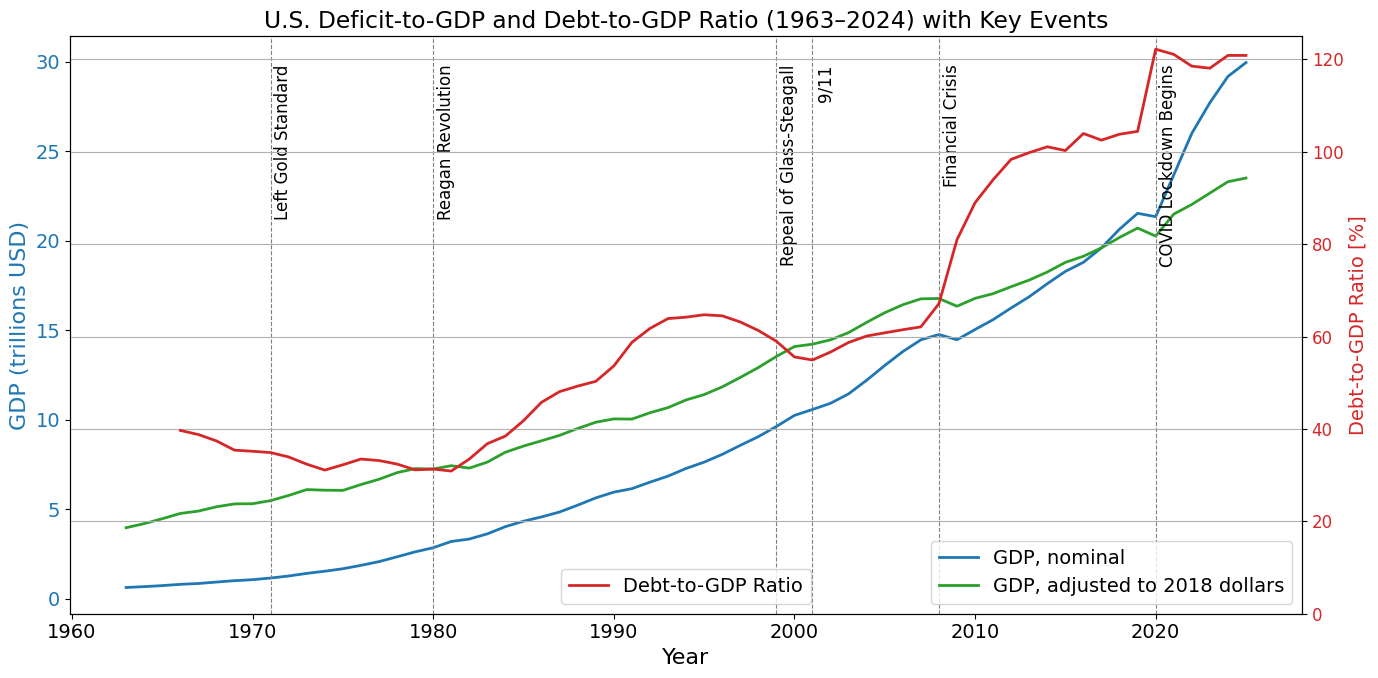

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

plt.rcParams.update({'font.size': 14} )  # Set default font size for the entire plot

# Plot GDP
color = "tab:blue"
ax1.set_xlabel("Year", fontsize=16)  # Increase x-axis label size
ax1.set_ylabel("GDP (trillions USD)", color=color, fontsize=16)  # Increase y-axis label size
ax1.plot(years, gdp_trillions, color=color, linewidth=2)  # make the line a bit thicker
ax1.tick_params(axis="y", labelcolor=color, labelsize=14)  # Increase tick label size
ax1.tick_params(axis="x", labelsize=14)  # Increase tick label size

color = "tab:green"
ax1.plot(years, gdp_real_trillions, color=color, linewidth=2)  # make the line a bit thicker
ax1.legend(["GDP, nominal", "GDP, adjusted to 2018 dollars"], fontsize=14)


# Plot Debt-to-GDP
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Debt-to-GDP Ratio [%]", color=color, fontsize=14)  # Increase y-axis label size
ax2.plot(years, debt_to_gdp, color=color, linewidth=2) #make the line a bit thicker
ax2.tick_params(axis="y", labelcolor=color, labelsize=12)  # Increase tick label size
ax2.set_ylim([0,125])
ax2.legend(["Debt-to-GDP Ratio"], fontsize=14, loc='lower center')

# Key historical annotations
annotations = {
    1971: "Left Gold Standard",
    1980: "Reagan Revolution",
    1999: "Repeal of Glass-Steagall",
    2001: "9/11",
    2008: "Financial Crisis",
    2020: "COVID Lockdown Begins",
}
for year, label in annotations.items():
    ax1.axvline(x=year, color="gray", linestyle="--", linewidth=0.8)
    ax1.text(year + 0.2, ax1.get_ylim()[1] * 0.95, label, rotation=90, verticalalignment='top', fontsize=12)

plt.title("U.S. GDP and Debt-to-GDP Ratio (1963–2024) with Key Events")
plt.grid(True)
plt.tight_layout()
plt.show()

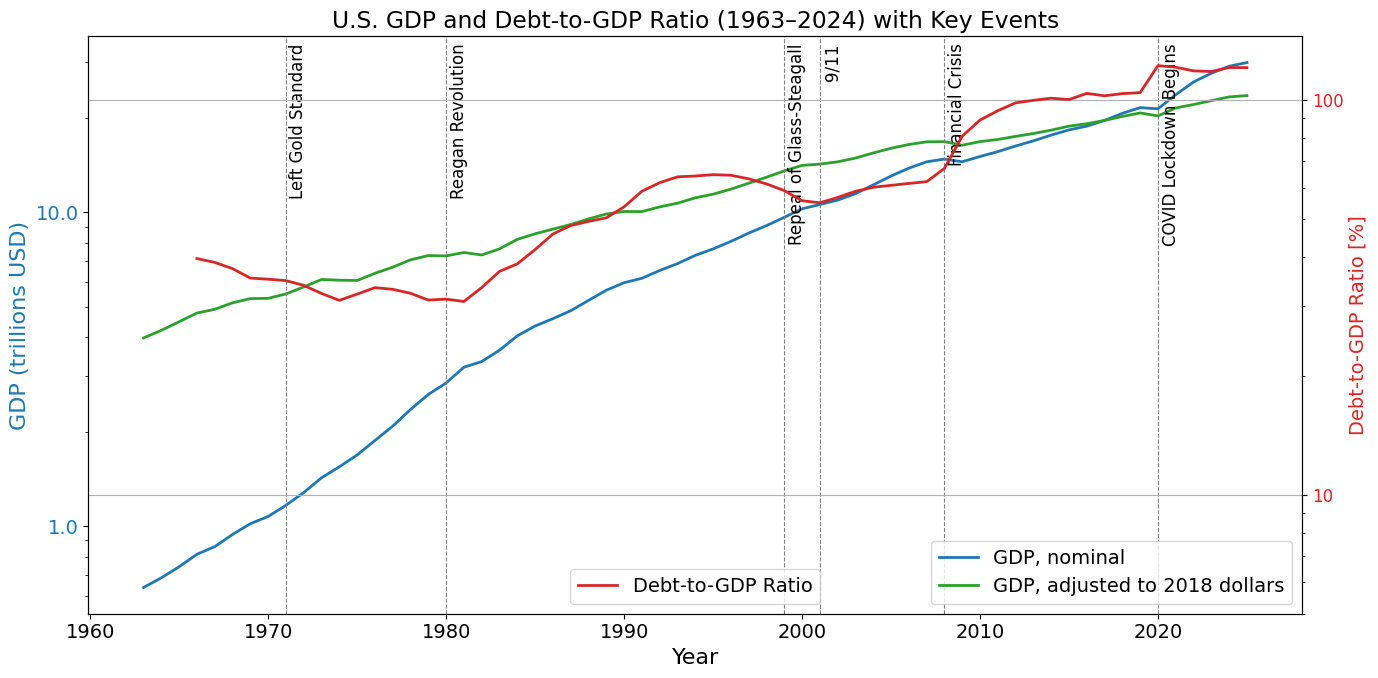

In [ ]:

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

plt.rcParams.update({'font.size': 14} )  # Set default font size for the entire plot

# Plot GDP
color = "tab:blue"
ax1.set_xlabel("Year", fontsize=16)  # Increase x-axis label size
ax1.set_ylabel("GDP (trillions USD)", color=color, fontsize=16)  # Increase y-axis label size
ax1.semilogy(years, gdp_trillions, color=color, linewidth=2)  # make the line a bit thicker
ax1.tick_params(axis="y", labelcolor=color, labelsize=14)  # Increase tick label size
ax1.tick_params(axis="x", labelsize=14)  # Increase tick label size

color = "tab:green"
ax1.semilogy(years, gdp_real_trillions, color=color, linewidth=2)  # make the line a bit thicker
ax1.legend(["GDP, nominal", "GDP, adjusted to 2018 dollars"], fontsize=14)
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=False))


# Plot Debt-to-GDP
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Debt-to-GDP Ratio [%]", color=color, fontsize=14)  # Increase y-axis label size
ax2.semilogy(years, debt_to_gdp, color=color, linewidth=2) #make the line a bit thicker
ax2.tick_params(axis="y", labelcolor=color, labelsize=12)  # Increase tick label size
ax2.set_ylim([5,145])
ax2.legend(["Debt-to-GDP Ratio"], fontsize=14, loc='lower center')
ax2.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=False))

# Key historical annotations
annotations = {
    1971: "Left Gold Standard",
    1980: "Reagan Revolution",
    1999: "Repeal of Glass-Steagall",
    2001: "9/11",
    2008: "Financial Crisis",
    2020: "COVID Lockdown Begins",
}
for year, label in annotations.items():
    ax1.axvline(x=year, color="gray", linestyle="--", linewidth=0.8)
    ax1.text(year + 0.2, ax1.get_ylim()[1] * 0.95, label, rotation=90, verticalalignment='top', fontsize=12)

plt.title("U.S. GDP and Debt-to-GDP Ratio (1963–2024) with Key Events")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Get daily gold price data (back to the 1960s)
# Downloaded from https://www.macrotrends.net/1333/historical-gold-prices-100-year-chart
gold_price = pd.read_csv('gold_price.csv')

gold_price.columns = ['Date', 'Price']
gold_price['Date'] = pd.to_datetime(gold_price.Date)
gold_price = gold_price.loc[(gold_price.Date >= start) &  (gold_price.Date <= end)]
gold_price_annual = gold_price.resample("YE",on='Date').mean()
# Align with GDP and compute GDP in gold ounces
gdp_in_gold = gdp_annual["GDP"] / gold_price_annual["Price"]


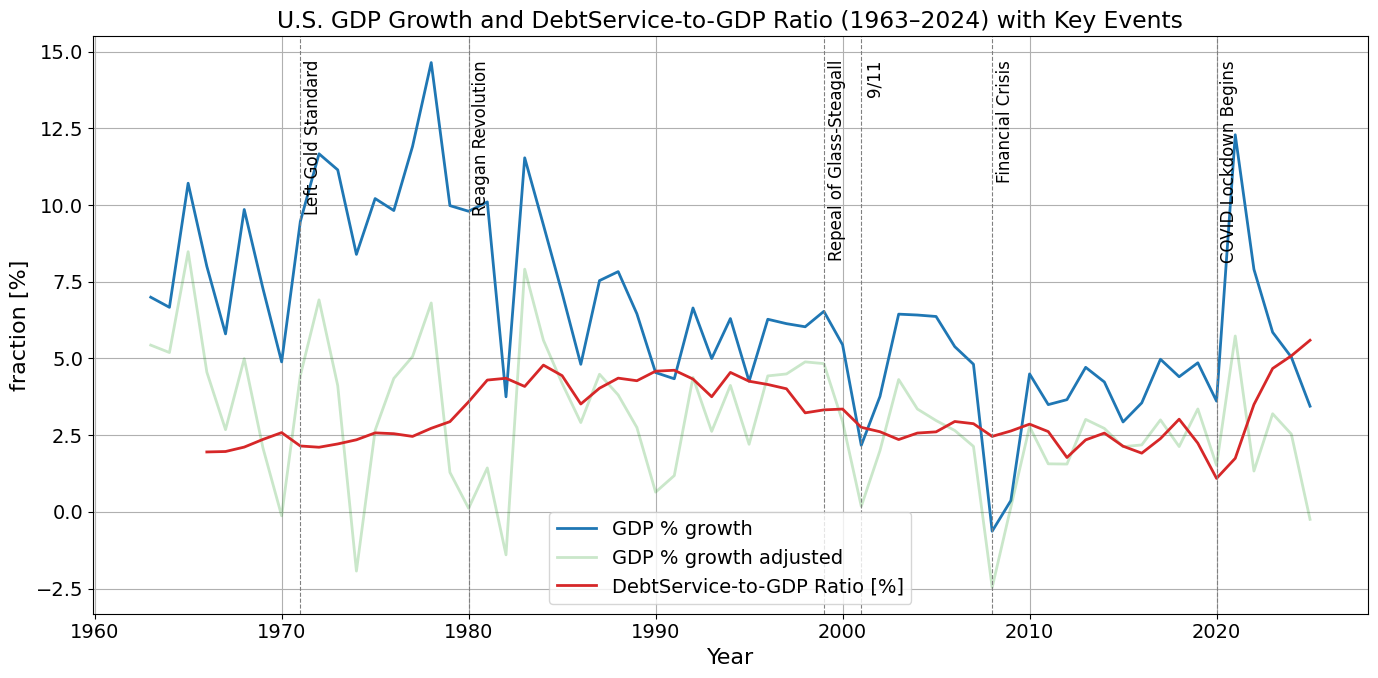

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.rcParams.update({'font.size': 14} )  # Set default font size for the entire plot

# Plot GDP Growth (nominal)
color = "tab:blue"
ax1.set_xlabel("Year", fontsize=16)  # Increase x-axis label size
ax1.set_ylabel("fraction [%]", fontsize=16)
ax1.plot(years, gdp_growth_qoq_annualized, color=color, linewidth=2)
ax1.tick_params(axis="y", labelsize=14)  # Increase tick label size
ax1.tick_params(axis="x", labelsize=14)  # Increase tick label size

# Plot GDP Growth (2012 dollars)
color = "tab:green"
ax1.plot(years, gdp_real_growth_qoq_annualized, color=color, linewidth=2, alpha=0.25)


# Plot DebtService-to-GDP
color = "tab:red"
ax1.plot(years, debtservice, color=color, linewidth=2)
ax1.legend(["GDP % growth", "GDP % growth adjusted", "DebtService-to-GDP Ratio [%]"], fontsize=14)

# Key historical annotations
annotations = {
    1971: "Left Gold Standard",
    1980: "Reagan Revolution",
    1999: "Repeal of Glass-Steagall",
    2001: "9/11",
    2008: "Financial Crisis",
    2020: "COVID Lockdown Begins",
}
for year, label in annotations.items():
    ax1.axvline(x=year, color="gray", linestyle="--", linewidth=0.8)
    ax1.text(year + 0.2, ax1.get_ylim()[1] * 0.95, label, rotation=90, verticalalignment='top', fontsize=12)

plt.title("U.S. GDP Growth and DebtService-to-GDP Ratio (1963–2024) with Key Events")
plt.grid(True)
plt.tight_layout()
plt.show()

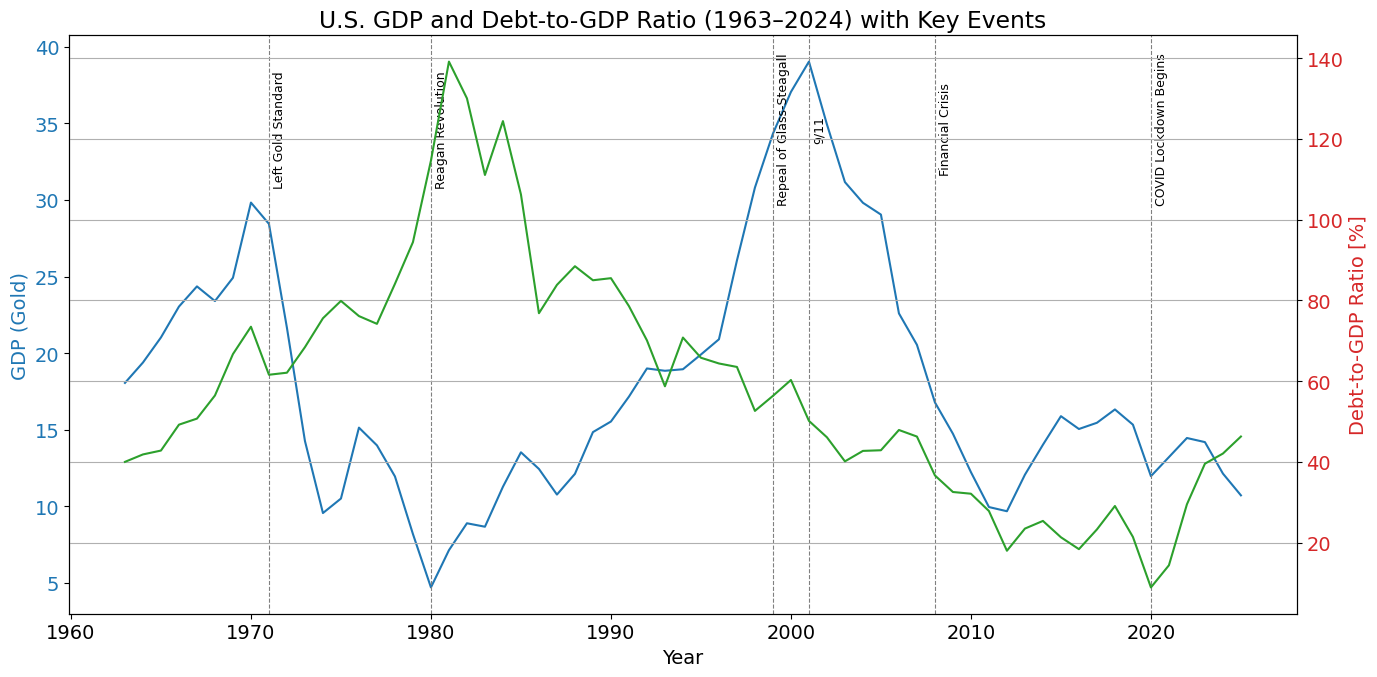

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot GDP
color = "tab:blue"
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (Gold)", color=color)
ax1.plot(years, gdp_in_gold, color=color)
ax1.tick_params(axis="y", labelcolor=color)

# Plot Debt-to-GDP
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Debt-to-GDP Ratio [%]", color=color)
ax2.plot(years, yield10_annual*10, color="tab:green")
#ax2.plot(years, debt_to_gdp, color=color)
ax2.tick_params(axis="y", labelcolor=color)

# Key historical annotations
annotations = {
    1971: "Left Gold Standard",
    1980: "Reagan Revolution",
    1999: "Repeal of Glass-Steagall",
    2001: "9/11",
    2008: "Financial Crisis",
    2020: "COVID Lockdown Begins",
}
for year, label in annotations.items():
    ax1.axvline(x=year, color="gray", linestyle="--", linewidth=0.8)
    ax1.text(year + 0.2, ax1.get_ylim()[1] * 0.85, label, rotation=90, verticalalignment='center', fontsize=9)

plt.title("U.S. GDP and Debt-to-GDP Ratio (1963–2024) with Key Events")
plt.grid(True)
plt.tight_layout()
plt.show()